# Inicializar series

In [1]:
import pandas as pd
import numpy as np
series_test = pd.Series([100, 200, 300])  
series_test2 = pd.Series({1999:100, 2000:200, 2001:300})  

In [2]:
series_test2

1999    100
2000    200
2001    300
dtype: int64

# Inicializar data frames

Son tablas donde las filas y columnas tienen etiquetas

In [3]:
frame_test = pd.DataFrame({1999:{'comida':200, 'bebida':250},
                           2000:{'comida':300, 'bebida':450}})
frame_test2 = pd.DataFrame([[200,201,202],
                            [100,501,202],
                            [300,251,502]],columns=[1999,2000,2001],index=['comida','bebida','extra'])
frame_test

,1999,2000
bebida,250,450
comida,200,300


In [4]:
frame_test2

,1999,2000,2001
comida,200,201,202
bebida,100,501,202
extra,300,251,502


# Accediendo al dataset de noticias

usando el archivo csv que obtuvimos de webscraper vamos a organizar un dataframe

In [6]:
pd.options.display.max_rows = 1000
#el_universal = pd.read_csv('eluniversal_2019_07_31_articles.csv')
el_universal = pd.read_csv('eluniversal_2019_07_30_articles.csv')

el_universal2 = pd.DataFrame([list(el_universal.loc[:,'title']),
                              list(el_universal.loc[:,'body']),
                              list(el_universal.loc[:,'url'])], index=['title','body','url'])
el_universal2 = el_universal2.T

el_universal = el_universal2

el_universal['title'][6]

'Portadas en Portugal le dan bienvenida a Mateus y Marchesín'

# Data wringling

Es la limpieza o transformacion de los datos para ingresarlos a un sistema especializado 

In [7]:
# Agregamos un id al dataset
el_universal['newspaper_uid'] = 'semana'

el_universal.loc[6:10]['title']


6     Portadas en Portugal le dan bienvenida a Mateu...
7      Arrancan con el registro para Médico en tu Calle
8     Cómo será la nueva marcación telefónica a part...
9     Trasladan a “El Cuini” al Altiplano por temor ...
10         En duda juegos de NFL en México en 2020-2021
Name: title, dtype: object

In [8]:
# obtenemos el Host de la URL
from urllib.parse import urlparse

el_universal['host'] = el_universal['url'].apply(lambda url: urlparse(url).netloc)



In [9]:
#contamos el universal host

el_universal['host'].value_counts()

www.eluniversal.com.mx         85
oaxaca.eluniversal.com.mx       5
sanluis.eluniversal.com.mx      5
www.eluniversalqueretaro.mx     5
www.unionjalisco.mx             4
www.unioncdmx.mx                3
www.unionpuebla.mx              2
www.unionyucatan.mx             2
www.unionedomex.mx              2
www.unionguanajuato.mx          1
Name: host, dtype: int64

In [10]:
#rellenar datos faltantes
missing_titles_mask = el_universal['title'].isnull()
missing_titles_mask[6:10] = True
missing_titles = (el_universal[missing_titles_mask]['url']
                        .str.extract(r'(?P<missing_titles>[^/]+)$')
                        .apply(lambda title: title.split('-'))
                        .apply(lambda title_word_list: ' '.join(title_word_list)))

el_universal.loc[missing_titles_mask, 'title'] = missing_titles


/home/mrromo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """


# Additional cleanup
    Operaciones adicionales para la limpieza de los datos y asignacion de un ID unico
    

In [11]:
import hashlib

uids = (el_universal
            .apply(lambda row: hashlib.md5(bytes(row['url'].encode())), axis=1)
            .apply(lambda hash_object: hash_object.hexdigest())
        
        )
el_universal['uid'] = uids
el_universal.set_index('uid', inplace=True)
el_universal

,title,body,url,newspaper_uid,host
uid,,,,,
614f80f98c169e221e58ae336cc4fd35,Guardia Nacional patrulla en cinco líneas del ...,\nEl Sistema de Transporte Colectivo Metro inf...,https://www.eluniversal.com.mx/metropoli/cdmx/...,semana,www.eluniversal.com.mx
e149d06c493411c358d24672d8f6a6c4,Qué hacer en Valle de Bravo con 600 pesos,"\nPaisajes boscosos, calles adoquinadas, casit...",https://www.eluniversal.com.mx/destinos/que-ha...,semana,www.eluniversal.com.mx
42228d61c49136e5f0d6f6e55c2ab1e4,"Romero Deschamps, a comparecer si hay mandato ...",\n[email protected]\n\nEl Consejo de la Judica...,https://www.eluniversal.com.mx/nacion/romero-d...,semana,www.eluniversal.com.mx
f8b94c6a41505d5278b09056a434d966,"""La Roca"" pateará traseros en ""Rápidos y furio...",\n[email protected]\n\nLos Ángeles.— Esta entr...,https://www.eluniversal.com.mx/espectaculos/ci...,semana,www.eluniversal.com.mx
41c8b8ea8b0532d328fa9f7d9843bbbb,UIF analiza movimientos financieros de Rosario...,\nCDMX.- El titular de la Unidad de Inteligenc...,https://www.eluniversal.com.mx/nacion/uif-anal...,semana,www.eluniversal.com.mx
cb76f7d520b0f8f219e743a4d0688a2a,"Becas ISSFAM 2019-2020, fechas clave",\n\n\n\n googletag.cmd.push(function() {\n ...,http://www.unioncdmx.mx/articulo/2019/07/30/ed...,semana,www.unioncdmx.mx
da0e102e9c42ca4a253f5a92fc791cc4,portadas en portugal le dan bienvenida mateus ...,\nEn Portugal prácticamente ya les dan la bien...,https://www.eluniversal.com.mx/universal-depor...,semana,www.eluniversal.com.mx
5293dde09b2c3a916d57fc7454395010,arrancan con el registro para medico en tu calle,El programa Médico en tu Calle arrancó el proc...,http://www.eluniversalqueretaro.mx/portada/arr...,semana,www.eluniversalqueretaro.mx
8ae0958e0f326a6f7ba9a82d5b1892b3,enterate como sera la nueva marcacion telefonica,\nEl próximo 3 de agosto entrará en vigor el c...,https://www.eluniversal.com.mx/cartera/telecom...,semana,www.eluniversal.com.mx


# Eliminando los saltos de linea

In [12]:
stripped_body = (el_universal
                    .apply(lambda row: row['body'], axis=1)
                    .apply(lambda body: list(body))
                    .apply(lambda letters: list(map(lambda letter: letter.replace('\n',''),letters)))
                    .apply(lambda letters: ''.join(letters))
                )
stripped_body

uid
614f80f98c169e221e58ae336cc4fd35    El Sistema de Transporte Colectivo Metro infor...
e149d06c493411c358d24672d8f6a6c4    Paisajes boscosos, calles adoquinadas, casitas...
42228d61c49136e5f0d6f6e55c2ab1e4    [email protected]El Consejo de la Judicatura F...
f8b94c6a41505d5278b09056a434d966    [email protected]Los Ángeles.— Esta entrevista...
41c8b8ea8b0532d328fa9f7d9843bbbb    CDMX.- El titular de la Unidad de Inteligencia...
cb76f7d520b0f8f219e743a4d0688a2a        googletag.cmd.push(function() {      googl...
da0e102e9c42ca4a253f5a92fc791cc4    En Portugal prácticamente ya les dan la bienve...
5293dde09b2c3a916d57fc7454395010    El programa Médico en tu Calle arrancó el proc...
8ae0958e0f326a6f7ba9a82d5b1892b3    El próximo 3 de agosto entrará en vigor el cam...
0cf02ad17b91db37a4166cd35f66037d    Por temor a que Abigael González Valencia, ali...
75e4c7c4d4cb086d46430f5aff5d8444    La Secretaría de Turismo (Sectur) tratará de n...
8af89fa5277a261832fc441bc1e1fdad    [email protect

In [13]:
stripped_body = (el_universal
                    .apply(lambda row: row['body'], axis=1)
                    .apply(lambda body: list(body))
                    .apply(lambda letters: pd.Series(letters).value_counts())
                )

letr = pd.Series(list(el_universal['body'][0])).value_counts()

stripped_body.sum().sort_values(ascending=False)



      49081.0
e     31470.0
a     28265.0
o     20070.0
s     17433.0
n     16783.0
r     15810.0
i     15213.0
l     13161.0
d     12280.0
t     10833.0
c     10581.0
u      9378.0
p      6219.0
m      5919.0
\n     3196.0
,      3022.0
b      2670.0
g      2665.0
q      2242.0
v      2098.0
ó      2081.0
.      1942.0
y      1937.0
f      1714.0
h      1525.0
í      1180.0
E      1001.0
á       988.0
z       972.0
j       941.0
A       828.0
x       803.0
C       765.0
é       710.0
S       680.0
0       670.0
M       662.0
        627.0
P       615.0
L       585.0
1       549.0
2       480.0
ñ       468.0
R       462.0
D       378.0
F       372.0
ú       347.0
T       345.0
N       299.0
I       297.0
G       269.0
“       268.0
)       262.0
”       258.0
(       257.0
O       231.0
U       210.0
V       209.0
9       196.0
:       188.0
H       188.0
J       188.0
5       178.0
3       175.0
4       172.0
B       161.0
;       148.0
8       147.0
7       147.0
"       144.0
-     

# Data enrichment


In [49]:
import nltk 

from nltk.corpus import stopwords

stop_words = set(stopwords.words('spanish'))

def tokenize_column(df, column_name):
    return(df
            .dropna()
            .apply(lambda row: nltk.word_tokenize(row[column_name]), axis=1)
            .apply(lambda tokens: list(filter(lambda token: token.isalpha(),tokens)))
            .apply(lambda tokens: list(map(lambda token: token.lower(), tokens)))
            .apply(lambda word_list: list(filter(lambda word: word not in stop_words, word_list)))
            .apply(lambda valid_word_list: len(valid_word_list))
    )

el_universal['n_tokens_title'] = tokenize_column(el_universal,'title')    
el_universal['n_tokens_body'] = tokenize_column(el_universal,'body')    

el_universal    

,title,body,url,newspaper_uid,host,n_tokens_title,n_tokens_body
uid,,,,,,,
614f80f98c169e221e58ae336cc4fd35,Guardia Nacional patrulla en cinco líneas del ...,\nEl Sistema de Transporte Colectivo Metro inf...,https://www.eluniversal.com.mx/metropoli/cdmx/...,semana,www.eluniversal.com.mx,6,90
e149d06c493411c358d24672d8f6a6c4,Qué hacer en Valle de Bravo con 600 pesos,"\nPaisajes boscosos, calles adoquinadas, casit...",https://www.eluniversal.com.mx/destinos/que-ha...,semana,www.eluniversal.com.mx,4,284
42228d61c49136e5f0d6f6e55c2ab1e4,"Romero Deschamps, a comparecer si hay mandato ...",\n[email protected]\n\nEl Consejo de la Judica...,https://www.eluniversal.com.mx/nacion/romero-d...,semana,www.eluniversal.com.mx,8,206
f8b94c6a41505d5278b09056a434d966,"""La Roca"" pateará traseros en ""Rápidos y furio...",\n[email protected]\n\nLos Ángeles.— Esta entr...,https://www.eluniversal.com.mx/espectaculos/ci...,semana,www.eluniversal.com.mx,7,400
41c8b8ea8b0532d328fa9f7d9843bbbb,UIF analiza movimientos financieros de Rosario...,\nCDMX.- El titular de la Unidad de Inteligenc...,https://www.eluniversal.com.mx/nacion/uif-anal...,semana,www.eluniversal.com.mx,6,101
cb76f7d520b0f8f219e743a4d0688a2a,"Becas ISSFAM 2019-2020, fechas clave",\n\n\n\n googletag.cmd.push(function() {\n ...,http://www.unioncdmx.mx/articulo/2019/07/30/ed...,semana,www.unioncdmx.mx,4,54
da0e102e9c42ca4a253f5a92fc791cc4,portadas en portugal le dan bienvenida mateus ...,\nEn Portugal prácticamente ya les dan la bien...,https://www.eluniversal.com.mx/universal-depor...,semana,www.eluniversal.com.mx,6,124
5293dde09b2c3a916d57fc7454395010,arrancan con el registro para medico en tu calle,El programa Médico en tu Calle arrancó el proc...,http://www.eluniversalqueretaro.mx/portada/arr...,semana,www.eluniversalqueretaro.mx,4,223
8ae0958e0f326a6f7ba9a82d5b1892b3,enterate como sera la nueva marcacion telefonica,\nEl próximo 3 de agosto entrará en vigor el c...,https://www.eluniversal.com.mx/cartera/telecom...,semana,www.eluniversal.com.mx,5,248


# Duplicate values

In [44]:
# Eliminar duplicados

el_universal.drop_duplicates(subset=['title'], keep= 'first', inplace= True)

In [29]:
clean_el_universal = pd.read_csv('semana.csv')
clean_semana = pd.read_csv('eluniversal.csv')


In [30]:
clean_el_universal.describe()

,n_tokens_title,n_tokens_body
count,65.000000,65.000000
mean,5.492308,449.846154
std,2.646478,316.525188
min,0.000000,0.000000
25%,4.000000,283.000000
50%,6.000000,374.000000
75%,7.000000,520.000000
max,13.000000,1574.000000


# Visualizacion 
ploting de los datos limpios

In [31]:
%matplotlib inline

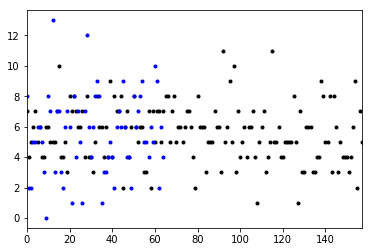

In [32]:
clean_semana['n_tokens_title'].plot(style='k.')
clean_el_universal['n_tokens_title'].plot(style='b.')

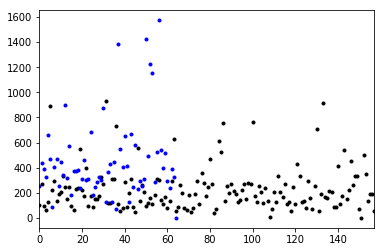

In [33]:
clean_semana['n_tokens_body'].plot(style='k.')
clean_el_universal['n_tokens_body'].plot(style='b.')

newspaper_uid
eluniversal.csv    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
semana.csv         [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

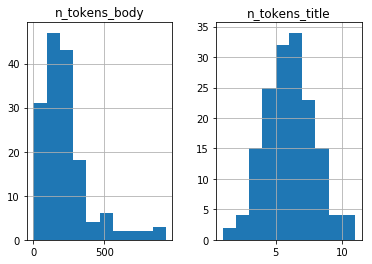

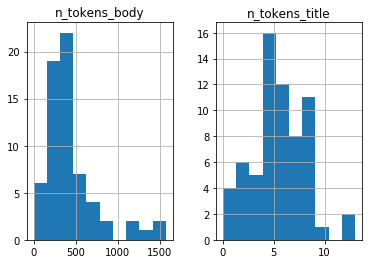

In [34]:
all_newspapers = pd.concat([clean_el_universal,clean_semana])

grouped = all_newspapers.groupby('newspaper_uid')

grouped.hist()

In [35]:
grouped['n_tokens_body'].agg(['min','mean','max'])

,min,mean,max
newspaper_uid,,,
eluniversal.csv,0,228.664557,933
semana.csv,0,449.846154,1574


newspaper_uid
eluniversal.csv    AxesSubplot(0.125,0.125;0.775x0.755)
semana.csv         AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

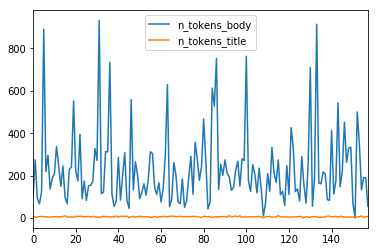

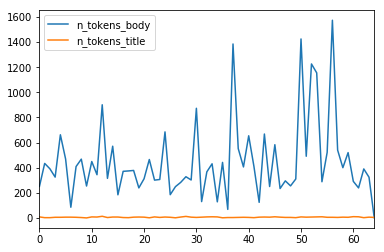

In [36]:
grouped.plot()